In [75]:
import pandas as pd
import sys 
import numpy as np
from math import sqrt
from pylab import rcParams

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge

from sklearn.ensemble import StackingRegressor

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


In [76]:
df_train = pd.read_csv('train.csv', sep=',')
print(df_train.shape)
df_test = pd.read_csv('test.csv', sep=',')
print(df_test.shape)

(1460, 81)
(1459, 80)


In [77]:
df_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [78]:
df_test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [79]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [80]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [81]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

AVG = 180921.19

MAX = 755000.00

ОБРАБОТКА ДАТАСЕТА train.csv

In [82]:
#Дропаем ID потому что он не нужен для обучения модели или предсказания цены
train_ID = df_train['Id']
test_ID = df_test['Id']

df_train.drop(['Id'], axis=1, inplace=True)
df_test.drop(['Id'], axis=1, inplace=True)

df_train.shape, df_test.shape

((1460, 80), (1459, 79))

In [83]:
#проверка на выбросы
sns.set_style('whitegrid')
edgecolor = 'black'
fig = plt.figure(figsize=(12,12))

#функция для построения точечной диаграммы между объектом и ценой продажи
def scatter_plot(a):
    fig, ax = plt.subplots()
    ax.scatter(x = df_train[a], y = df_train['SalePrice'], edgecolor=edgecolor)
    plt.ylabel('SalePrice', fontsize=12)
    plt.xlabel(a, fontsize=12)
    plt.suptitle("Точечная диаграмма "+ a + " и SalePrice")
    plt.show()

<Figure size 1200x1200 with 0 Axes>

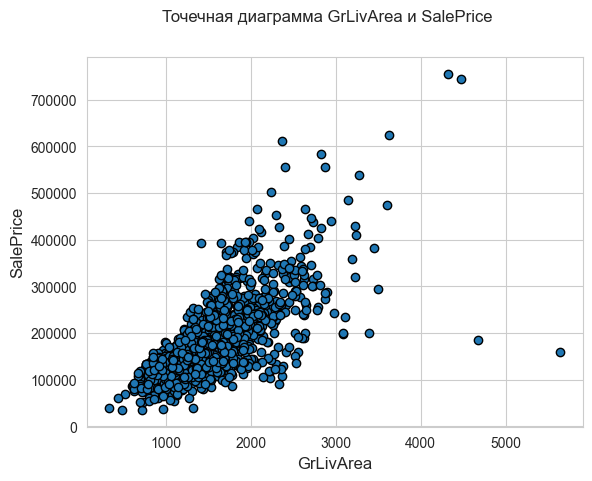

In [84]:
scatter_plot('GrLivArea')

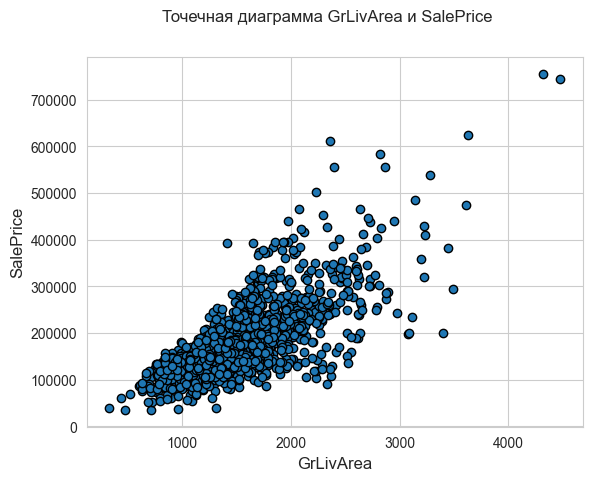

In [85]:
#удаление выбросов
df_train =  df_train.drop( df_train[( df_train['GrLivArea'] > 4000) & ( df_train['SalePrice']<300000)].index)
scatter_plot('GrLivArea')

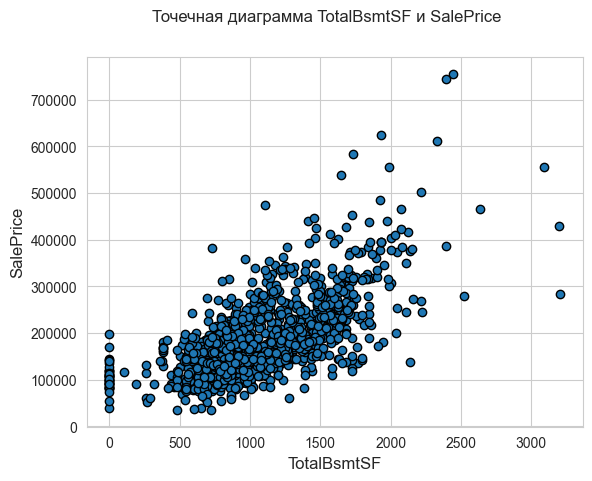

In [86]:
scatter_plot('TotalBsmtSF')

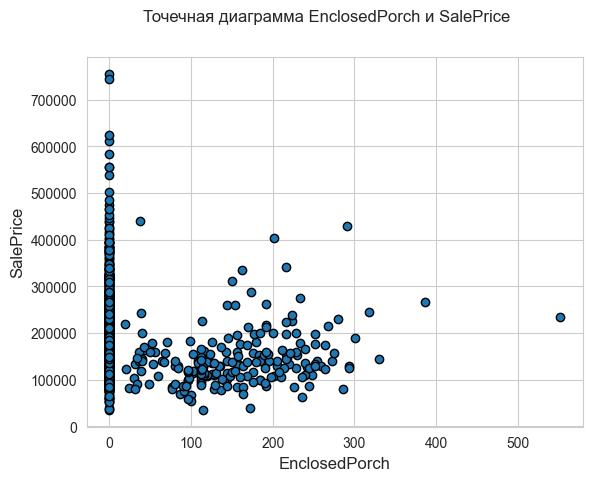

In [87]:
scatter_plot('EnclosedPorch')

Здесь присутствуют выбросы, которые могут повлиять на предсказание. Удаляем!

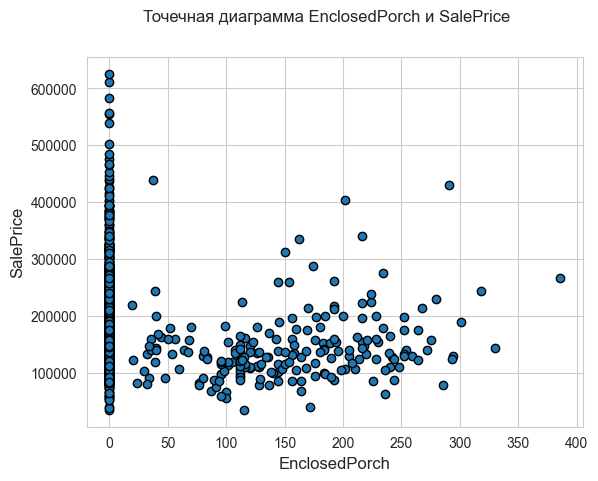

In [88]:
#удаление выбросов
df_train =  df_train.drop( df_train[( df_train['EnclosedPorch']>400)].index)
df_train =  df_train.drop( df_train[( df_train['SalePrice']>700000)].index)
scatter_plot('EnclosedPorch')

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

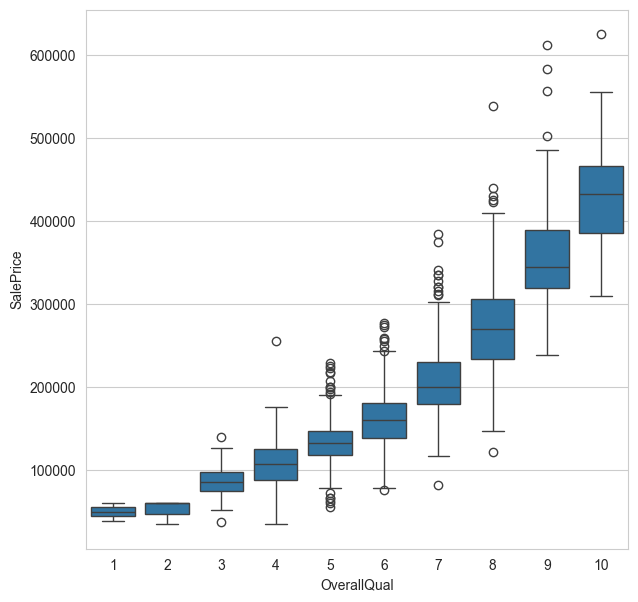

In [89]:
#построение прямоугольного графика для категориального признака: Overall Quality 
fig = plt.figure(figsize=(7,7))
data = pd.concat([df_train['SalePrice'], df_train['OverallQual']], axis=1)
sns.boxplot(x = df_train['OverallQual'], y="SalePrice", data = data)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111],
 [Text(0, 0, '1872'),
  Text(1, 0, '1875'),
  Text(2, 0, '1880'),
  Text(3, 0, '1882'),
  Text(4, 0, '1885'),
  Text(5, 0, '1890'),
  Text(6, 0, '1892'),
  Text(7, 0, '1893'),
  Text(8, 0, '1898'),
  Text(9, 0, '1900'),
  Text(10, 0, '1904'),
  Text(11, 0, '1905'),
  Text(12, 0, '1906'),
  Text(13, 0, '1908'),
  Text(14, 0,

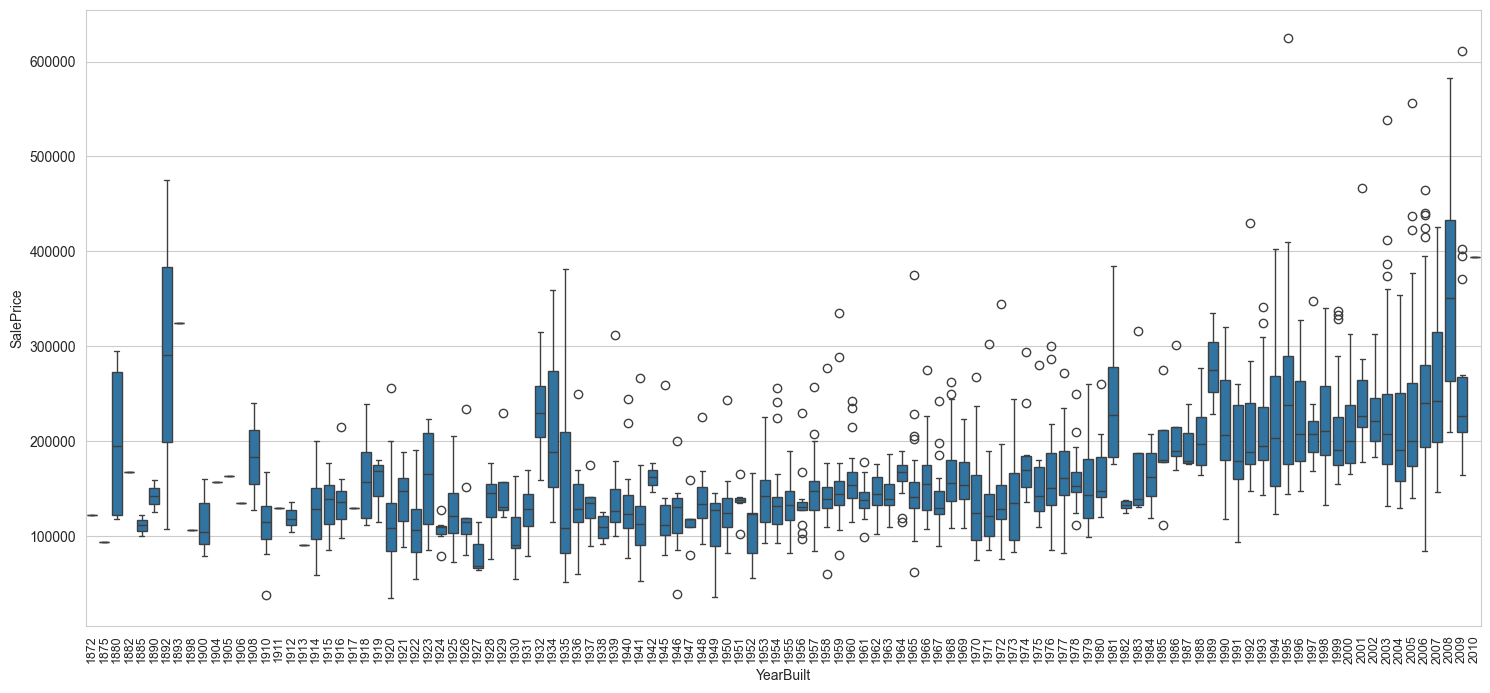

In [90]:
#построение прямоугольного графика для категориального признака: Year Built
fig = plt.figure(figsize=(18,8))
data = pd.concat([df_train['SalePrice'], df_train['YearBuilt']], axis=1)
sns.boxplot(x= df_train['YearBuilt'], y="SalePrice", data=data)
plt.xticks(rotation=90,fontsize= 9)

C:\Users\misha\AppData\Local\Temp\ipykernel_9976\3846013508.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['SalePrice'])


Skewness: 1.567473
Kurtosis: 3.888317


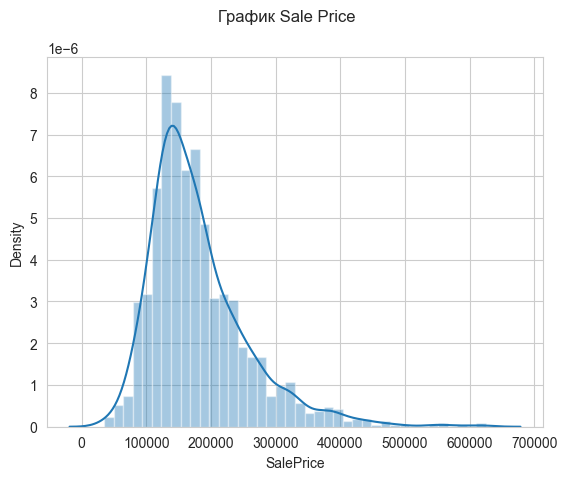

In [91]:
sns.distplot(df_train['SalePrice'])

plt.suptitle( "График Sale Price")

print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

C:\Users\misha\AppData\Local\Temp\ipykernel_9976\2402043497.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['SalePrice'])


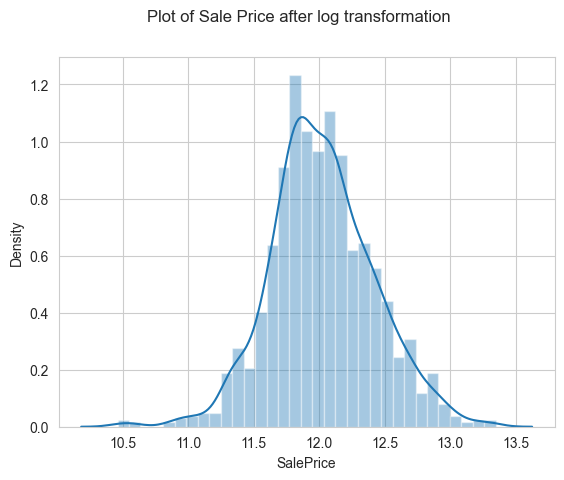

In [92]:
# Применение логарифмического преобразования для коррекции положительной асимметрии данных
# Взятие логарифмов означает, что ошибки при прогнозировании дорогих и дешевых домов будут одинаково влиять на результат  
df_train['SalePrice'] = np.log(df_train['SalePrice'])
plt.suptitle("Plot of Sale Price after log transformation")
sns.distplot(df_train['SalePrice'])
plt.show()

In [93]:
df_train['SalePrice'].describe()

count    1455.000000
mean       12.021706
std         0.396112
min        10.460242
25%        11.774520
50%        12.001505
75%        12.272562
max        13.345507
Name: SalePrice, dtype: float64

In [94]:
df_train['SalePrice']

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1455, dtype: float64

In [95]:
df_train.shape

(1455, 80)

##### Обработка недостающих данных

In [96]:
#function to see the missing data in a dataframe
def missing_data(df,n):    
    total = df.isnull().sum().sort_values(ascending=False)          # общее количество недостающих данных
    percentage = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)*100  # % недостающих данных
    No_unique_val = df.nunique()                                   # общее количество уникальных данных
    missing_data = pd.concat([total, percentage, No_unique_val], axis=1, 
                             keys=['Общее количество недостающих данных', '% недостающих данных','Общее количество уникальных данных'], sort = False)
    
    print(missing_data.head(n))

In [97]:
#training data    
missing_data(df_train,20)

              Общее количество недостающих данных  % недостающих данных  \
PoolQC                                       1451             99.725086   
MiscFeature                                  1401             96.288660   
Alley                                        1364             93.745704   
Fence                                        1176             80.824742   
MasVnrType                                    870             59.793814   
FireplaceQu                                   690             47.422680   
LotFrontage                                   259             17.800687   
GarageYrBlt                                    81              5.567010   
GarageCond                                     81              5.567010   
GarageType                                     81              5.567010   
GarageFinish                                   81              5.567010   
GarageQual                                     81              5.567010   
BsmtExposure             

In [98]:
df_train['PoolQC'].unique()

array([nan, 'Fa', 'Gd'], dtype=object)

- PoolQC, Alley, MiscFeature надо дропать из-за большого количества недостающих данных 

In [99]:
missing_data(df_test,34)

              Общее количество недостающих данных  % недостающих данных  \
PoolQC                                       1456             99.794380   
MiscFeature                                  1408             96.504455   
Alley                                        1352             92.666210   
Fence                                        1169             80.123372   
MasVnrType                                    894             61.274846   
FireplaceQu                                   730             50.034270   
LotFrontage                                   227             15.558602   
GarageYrBlt                                    78              5.346127   
GarageFinish                                   78              5.346127   
GarageQual                                     78              5.346127   
GarageCond                                     78              5.346127   
GarageType                                     76              5.209047   
BsmtCond                 

In [100]:
df_test['Utilities'].unique()

array(['AllPub', nan], dtype=object)

все значения Utilities походу 'AllPub', поэтому дропаем 
как и alley, poolqc и miscfeatures

In [101]:
#вычисляем общее количество столбцов с нулем в train.csv
null_train = df_train.isnull().sum().sum()
print(null_train)

#считаем общее количество нулей в test.csv
null_test = df_test.isnull().sum().sum()
print(null_test)

7812
7878


In [102]:
# save the 'SalePrice'column as train_label
train_label = df_train['SalePrice'].reset_index(drop=True)

# # drop 'SalePrice' column from df_train 
df_train = df_train.drop(['SalePrice'], axis=1)
# # now df_train contains all training features

In [103]:
def missing (df):
    
    # удаление этих столбцов из-за большого количества пропущенных значений или множества одинаковых значений
    df = df.drop(['Utilities','PoolQC','MiscFeature','Alley'], axis=1)
    
    # Пропущенное значение вероятно означает отсутствие забора, поэтому заполняем его как "None"
    df["Fence"] = df["Fence"].fillna("None") 
    
    # Пропущенное значение вероятно означает отсутствие камина, поэтому заполняем его как "None"
    df["FireplaceQu"] = df["FireplaceQu"].fillna("None")
    
    # Lot frontage - это длина участка, примыкающего к участку, которая вероятно схожа с домами в этом районе, поэтому заполняем медианным значением
    df["LotFrontage"] = df["LotFrontage"].fillna(df["LotFrontage"].median())
    
    # Пропущенное значение вероятно означает типичное (Typ)
    df["Functional"] = df["Functional"].fillna("Typ")
    
    # Только одно пропущенное значение, поэтому заполняем наиболее часто встречающимся значением (mode)
    df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])  
    
    # Только одно пропущенное значение, поэтому заполняем наиболее часто встречающимся значением (mode)
    df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
    
    # Очень мало пустых значений, поэтому заполните наиболее частым значением (mode)
    df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])
    
    # Вероятно, значение Null означает отсутствие облицовки, поэтому заполним как "None" (поскольку это категориальный признак)
    df["MasVnrType"] = df["MasVnrType"].fillna("None") 
    df["MasVnrArea"] = df["MasVnrArea"].fillna(0)      #заполним 0
    
    # Только одно пустое значение, поэтому заполните наиболее частым значением (mode)
    df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
    df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
    
    #Общая классификация зонирования, очень мало пустых значений, поэтому заполните наиболее частым значением (mode)
    df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])
    
    # Вероятно, значение Null означает отсутствие определенного типа жилья, поэтому заполните как "None"
    df['MSSubClass'] = df['MSSubClass'].fillna("None")
    
    # Ноль скорее всего означает что гаража нет в доме, поэтому заменим на None
    for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
        df[col] = df[col].fillna('None')
    
    # Вероятно, значение Null означает отсутствие гаража и машин в гараже, поэтому заполните как 0
    for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
        df[col] = df[col].fillna(0)
    
    # Вероятно, значение Null означает отсутствие подвала, поэтому заполните как 0
    for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
        df[col] = df[col].fillna(0)
    
    # Вероятно, значение Null означает отсутствие подвала, поэтому заполните как "None" (поскольку это категориальные признаки)
    for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
        df[col] = df[col].fillna('None')
    
    return df

In [104]:
df_train = missing(df_train)
df_test = missing(df_test)

In [105]:
# считаем количество нулей в train.csv
null_train = df_train.isnull().sum().sum()
print(null_train)

# считаем количество нулей в test.csv
null_test = df_test.isnull().sum().sum()
print(null_test)

0
0


In [106]:
df_train.shape,df_test.shape

((1455, 75), (1459, 75))

In [107]:
def add_new_cols(df):
    
    df['Total_SF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

    df['Total_Bathrooms'] = (df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] 
                             + (0.5 * df['BsmtHalfBath']))

    df['Total_Porch_SF'] = (df['OpenPorchSF'] + df['3SsnPorch'] + df['EnclosedPorch'] + 
                            df['ScreenPorch'] + df['WoodDeckSF'])

    df['Total_Square_Feet'] = (df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['1stFlrSF'] + df['2ndFlrSF'])
    
    df['Total_Quality'] = df['OverallQual'] + df['OverallCond']
    
    return df

In [108]:
# добавить новые колонки
df_train = add_new_cols(df_train)
df_test = add_new_cols(df_test)

In [109]:
df_train.shape,df_test.shape

((1455, 80), (1459, 80))

### Проверяем типы данных

In [110]:
#training data
g1 = df_train.columns.to_series().groupby(df_train.dtypes).groups

In [111]:
{k.name: v for k, v in g1.items()}

{'int64': Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
        'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
        '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
        'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
        'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
        'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
        'MiscVal', 'MoSold', 'YrSold', 'Total_SF', 'Total_Porch_SF',
        'Total_Square_Feet', 'Total_Quality'],
       dtype='object'),
 'float64': Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'Total_Bathrooms'], dtype='object'),
 'object': Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',
        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
        'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
        'MasVnrType', 'ExterQual', 'ExterCon

In [112]:
# testing data
g2 = df_test.columns.to_series().groupby(df_test.dtypes).groups

In [113]:
{k.name: v for k, v in g2.items()}

{'int64': Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
        'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
        'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
        'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
        'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
        'Total_Porch_SF', 'Total_Quality'],
       dtype='object'),
 'float64': Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
        'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
        'GarageCars', 'GarageArea', 'Total_SF', 'Total_Bathrooms',
        'Total_Square_Feet'],
       dtype='object'),
 'object': Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',
        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
        'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
        'MasVnrType', 'ExterQ

In [114]:
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

print(df_train.shape)
print(df_test.shape)

(1455, 292)
(1459, 278)


In [115]:
df_train, df_test = df_train.align(df_test, join = 'inner', axis=1)

In [116]:
print(df_train.shape)
print(df_test.shape)

(1455, 278)
(1459, 278)


In [117]:
# calculate total number of null values in training data
null_train = df_train.isnull().sum().sum()
print(null_train)

# calculate total number of null values in test data
null_test = df_test.isnull().sum().sum()
print(null_test)

0
0


In [118]:
df_train.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,False,False,False,True,False,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,False,False,False,True,False,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,False,False,False,True,False,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,False,False,False,True,True,False,False,False,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,False,False,False,True,False,False,False,False,True,False


In [119]:
df_test.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,False,False,False,True,False,False,False,False,True,False
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,False,False,False,True,False,False,False,False,True,False
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,False,False,False,True,False,False,False,False,True,False
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,False,False,False,True,False,False,False,False,True,False
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,False,False,False,True,False,False,False,False,True,False


In [120]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1455 entries, 0 to 1459
Columns: 278 entries, MSSubClass to SaleCondition_Partial
dtypes: bool(237), float64(4), int64(37)
memory usage: 814.2 KB


In [121]:
X_test = df_test    

In [122]:
df_train["SalePrice"] = train_label

In [123]:
df_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,False,False,True,False,False,False,False,True,False,12.247694
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,False,False,True,False,False,False,False,True,False,12.109011
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,False,False,True,False,False,False,False,True,False,12.317167
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,False,False,True,True,False,False,False,False,False,11.849398
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,False,False,True,False,False,False,False,True,False,12.429216


In [124]:
train_set, valid_set = train_test_split(df_train,train_size= 0.7, shuffle=False)

X_train = train_set.drop(["SalePrice"], axis=1)  # training features
y_train = train_set["SalePrice"].copy()             # training label

X_valid = valid_set.drop(["SalePrice"], axis=1)  # testing features
y_valid = valid_set["SalePrice"].copy()               # testing label

In [125]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print()
print("X_valid shape: {}".format(X_valid.shape))
print("y_valid shape: {}".format(y_valid.shape))
print()
print("X_test shape: {}".format(X_test.shape))

X_train shape: (1018, 278)
y_train shape: (1018,)

X_valid shape: (437, 278)
y_valid shape: (437,)

X_test shape: (1459, 278)


### Проверяем типы данных и нулевые значения


In [126]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1018 entries, 0 to 1020
Columns: 278 entries, MSSubClass to SaleCondition_Partial
dtypes: bool(237), float64(4), int64(37)
memory usage: 569.6 KB


In [127]:
X_valid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 437 entries, 1021 to 1459
Columns: 278 entries, MSSubClass to SaleCondition_Partial
dtypes: bool(237), float64(4), int64(37)
memory usage: 244.5 KB


In [128]:
y_train

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1016    12.271345
1017    12.078239
1018    12.175613
1019    11.373663
1020    12.160029
Name: SalePrice, Length: 1018, dtype: float64

In [129]:
y_valid

1021    12.567237
1022    11.630709
1023    12.028739
1024    12.588191
1025    11.561716
          ...    
1455          NaN
1456          NaN
1457          NaN
1458          NaN
1459          NaN
Name: SalePrice, Length: 437, dtype: float64

In [130]:
null_t_x = X_train.isnull().sum().sum()
print(null_t_x)

null_t_y = y_train.isnull().sum().sum()
print(null_t_y)

0
0


In [131]:
null_v_x = X_valid.isnull().sum().sum()
print(null_v_x)

null_v_y = y_valid.isnull().sum().sum()
print(null_v_y)

0
5


почему 5 нулей блин

In [132]:
np.where(np.isnan(y_valid))

(array([432, 433, 434, 435, 436], dtype=int64),)

In [133]:
mean = np.nanmean(y_valid)
y_valid = np.nan_to_num(y_valid,nan = mean)

In [134]:
np.where(np.isnan(y_valid))

(array([], dtype=int64),)

In [135]:
y_valid.dtype

dtype('float64')

In [136]:
print("Valid data shape:")
print(X_valid.shape, y_valid.shape)
print()

Valid data shape:
(437, 278) (437,)

